# Predictive Analytics on Banking Retail.

### Problem Statement :
         Term deposits are being implemented in the banks for customers advantages,which will be helpfull for the customers who are in need of immediate cash at a moment.This data set has details of the customers with all features of account balance,credit card holder/not,age,marital status etc with a target variable of yes or no meaning whether he will subscribe for a term deposit or not.

### Goal :
        Our goal is to show how a simple predictive analytics exercise may be carried out on real data using open source statistical modelling software.To demonstrate how the results from a predictive analytics study can be applied to produce real, tangible improvements in a company’s business performance.



### Product :
        An Android application for bank which has both for updating the database and for predicting whether the person will subscribe for a term deposit or not.
        A web form with all the required details from nodered and connected through IBM cloud.

## Exploratory Data Analysis

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [5]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [6]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [7]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [9]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [10]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [11]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [12]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [13]:
cols=['education','poutcome','job','contact']
df[cols]=df[cols].replace(
{
    "unknown" : np.NaN
}
)

#### Null value-check

In [14]:
df.isnull().any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
deposit      False
dtype: bool

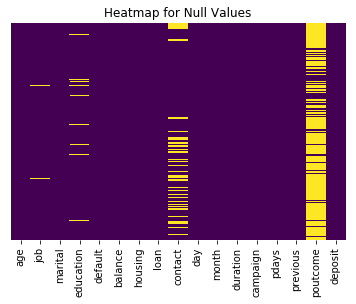

In [15]:
f1=plt.figure()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap for Null Values")
f1.savefig("p1.png")
plt.show()

### Observation :
1.We find that poutcome has more than 80% of Null values in the Dataset and We can drop it as we can never get information from poutcome.

2.Contact,Education and Job have lesser null values and can be replaced. 

#### Imputing null values

In [16]:
df["job"].fillna(df['job'].mode()[0],inplace=True)

In [17]:
df['job'].isnull().any()

False

In [18]:
s=df.groupby(['job','education'])
s.size()

job            education
admin.         primary        42
               secondary    1084
               tertiary      168
blue-collar    primary       694
               secondary    1116
               tertiary       48
entrepreneur   primary        41
               secondary     141
               tertiary      132
housemaid      primary       144
               secondary      78
               tertiary       43
management     primary        73
               secondary     253
               tertiary     2187
retired        primary       277
               secondary     314
               tertiary      140
self-employed  primary        28
               secondary     136
               tertiary      230
services       primary        83
               secondary     746
               tertiary       53
student        primary        21
               secondary     189
               tertiary       83
technician     primary        41
               secondary    1209
               ter

In [19]:
def impute_a(cols):
    job=cols[1]
    education=cols[0]
    if pd.isnull(education):
        if job == "admin":
            return 'secondary'
        elif job == "blue-collar":
            return 'secondary'
        elif job == 'entrepreneur':
            return 'secondary'
        elif job == 'unemployed':
            return 'secondary'
        elif job == 'housemaid':
            return 'primary'
        elif job == 'management':
            return 'tertiary'
        elif job == 'retired':
            return 'secondary'
        elif job == 'self-employed':
            return 'tertiary'
        elif job == 'services':
            return 'secondary'
        elif job == 'student':
            return 'secondary'
        elif job == 'technician':
            return 'secondary'
    else:
        return education
        

In [20]:
df['education']=df[['education','job']].apply(impute_a,axis=1)


In [21]:
df['education'].isnull().sum()

40

In [22]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [23]:
df['education'].isnull().sum()

0

In [24]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [25]:
df.iloc[19]

age                 49
job             admin.
marital       divorced
education    secondary
default             no
balance            168
housing            yes
loan               yes
contact            NaN
day                  8
month              may
duration           513
campaign             1
pdays               -1
previous             0
poutcome           NaN
deposit            yes
Name: 19, dtype: object

In [26]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [27]:
df['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

In [28]:
df['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

In [29]:
s1=df.groupby(['campaign','contact'])
s1.size()

campaign  contact  
1         cellular     3540
          telephone     293
2         cellular     2218
          telephone     190
3         cellular      912
          telephone      93
4         cellular      556
          telephone      64
5         cellular      264
          telephone      36
6         cellular      190
          telephone      28
7         cellular       90
          telephone      19
8         cellular       86
          telephone      16
9         cellular       34
          telephone      11
10        cellular       31
          telephone       4
11        cellular       22
          telephone       3
12        cellular       18
          telephone       2
13        cellular       21
          telephone       3
14        cellular       10
          telephone       1
15        cellular        5
          telephone       1
16        cellular        6
          telephone       1
17        cellular        7
          telephone       3
18        cellular        2


In [30]:
df['contact'].fillna(df['contact'].mode()[0],inplace=True)

In [31]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
deposit      False
dtype: bool

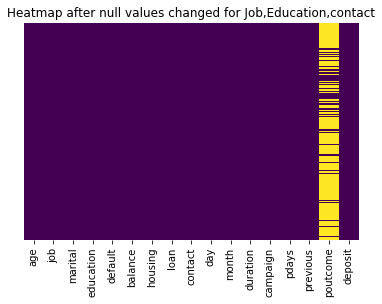

In [32]:
p2=plt.figure()
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title("Heatmap after null values changed for Job,Education,contact")
p2.savefig("p2.png")
plt.show()

#### Distribution  for 'deposit' with respect to other continous data.

In [33]:
yesss=df.loc[df["deposit"] == 'yes']
nooo=df.loc[df["deposit"] == 'no']


<Figure size 432x288 with 0 Axes>

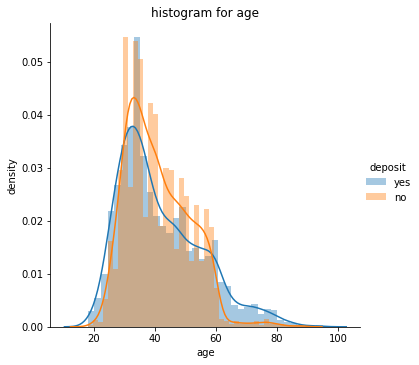

In [34]:
p3=plt.figure()
sns.FacetGrid(df, hue="deposit", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("histogram for age")
plt.ylabel("density")
p3.savefig("p3.png")
plt.show()



### Observation :
1.The people who have rejected the subscription have a mean age of 36-39 with roughly 39% of the data.

2.The people who have accepted the subscription have a mean age of 37-39 with roughly 43% of the data.

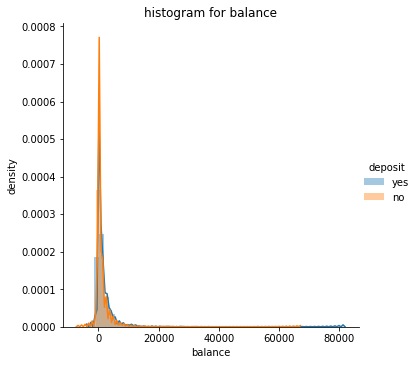

<Figure size 432x288 with 0 Axes>

In [35]:

sns.FacetGrid(df, hue="deposit", height=5) \
   .map(sns.distplot, "balance") \
   .add_legend()
plt.title("histogram for balance")
plt.ylabel("density")
plt.show()
p4=plt.figure()
p4.savefig("p4.png")

### Observation :
1.People who have rejected the subscription tend to have a lesser balance close to 0 an is right skewed.

2.People who have accepted the subscription have both overlapping in lesser and high balance as they are right skewed.

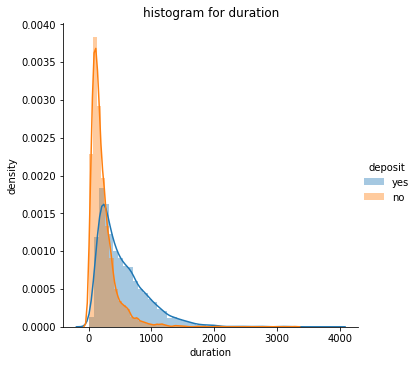

<Figure size 432x288 with 0 Axes>

In [36]:

sns.FacetGrid(df, hue="deposit", size=5) \
   .map(sns.distplot, "duration") \
   .add_legend()
plt.title("histogram for duration")
plt.ylabel("density")
plt.show()
p5=plt.figure()
p5.savefig('p5.png')


### Observation :
1.Duration being less have a higher rejection rate and is right skewed.

2.Duration with slightly greater with 700-1400 seconds have a high acceptance rate.

#### Countplots for 'deposit' with respect to other categorical columns

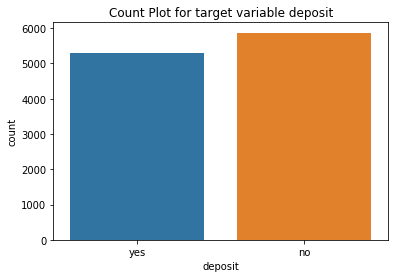

<Figure size 432x288 with 0 Axes>

In [37]:
sns.countplot(data=df,x="deposit")
plt.title("Count Plot for target variable deposit")
plt.show()
p6=plt.figure()
p6.savefig('p6.png')

### Observation :
1.We find that the data is balanced and requires not sought of Resampling.

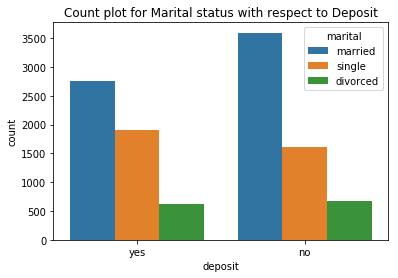

<Figure size 432x288 with 0 Axes>

In [38]:

sns.countplot(data=df,x="deposit",hue="marital")
plt.title("Count plot for Marital status with respect to Deposit")
plt.show()
p7=plt.figure()
p7.savefig("p7.png")

### Observation :
1.We find that the data is not differentiable with marital status of a person as they are identical.

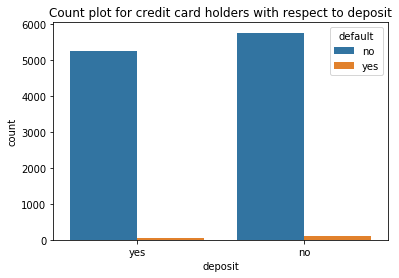

<Figure size 432x288 with 0 Axes>

In [39]:
sns.countplot(data=df,x="deposit",hue="default")
plt.title("Count plot for credit card holders with respect to deposit")
plt.show()
p8=plt.figure()
p8.savefig("p8.png")

### Observation :
1.We can find no differences in credit holders since they have equal distribution.

#### Density plots for columns.

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,NaN,yes


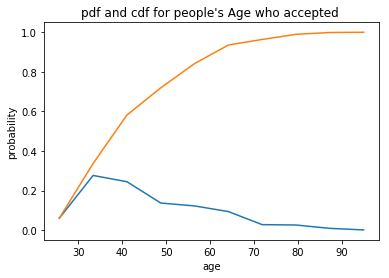

<Figure size 432x288 with 0 Axes>

In [41]:

counts, bin_edges = np.histogram(yesss['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's Age who accepted ")

plt.xlabel("age")
plt.ylabel("probability")
plt.show()
p9=plt.figure()
p9.savefig("p9.png")

### Observation :
1.The probablility density function of people's age has high frequencies ranging from Age 30-39 and has a lot of less frequency age.

2.Almost 90% of the people who accpeted have age less than 65. 

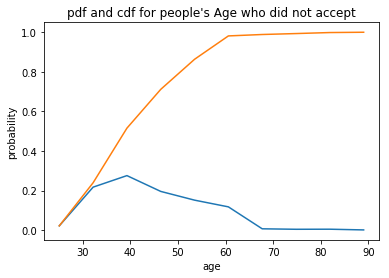

<Figure size 432x288 with 0 Axes>

In [42]:

counts, bin_edges = np.histogram(nooo['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's Age who did not accept")

plt.xlabel("age")
plt.ylabel("probability")
plt.show()
p10=plt.figure()
p10.savefig("p10.png")

### Observation :
1.People who did not accept had a frequency age of ranging from 39-40.

2.90% of the people who did not accept had a age less than 55.

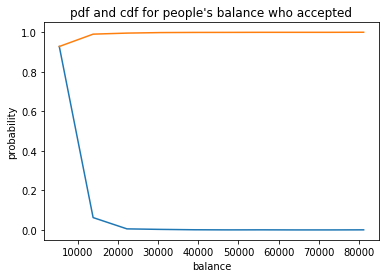

<Figure size 432x288 with 0 Axes>

In [43]:

counts, bin_edges = np.histogram(yesss['balance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's balance who accepted")

plt.xlabel("balance")
plt.ylabel("probability")
plt.show();
p11=plt.figure()
p11.savefig("p11.png")

### Observation :
1.Almost all the people had the common balance of less thsn 10000.

2.90% of the people's balance who did accepted had less than 10000 in their account.

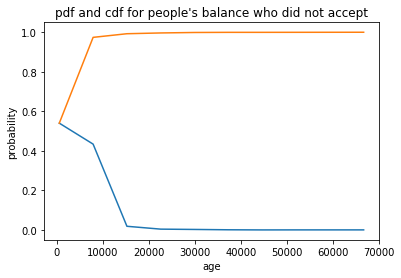

<Figure size 432x288 with 0 Axes>

In [44]:

counts, bin_edges = np.histogram(nooo['balance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's balance who did not accept")

plt.xlabel("age")
plt.ylabel("probability")
plt.show();
p12=plt.figure()
p12.savefig("p12.png")

### Observation :
1.Most people had their balance as 0 who did not accept.

2.90% of people had less than 5000 in their balance.

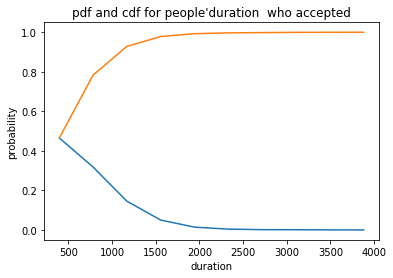

<Figure size 432x288 with 0 Axes>

In [45]:

counts, bin_edges = np.histogram(yesss['duration'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people'duration  who accepted")

plt.xlabel("duration")
plt.ylabel("probability")
plt.show();
p13=plt.figure()
p13.savefig("p13.png")

### observation :
1.most of the people had a spoken for less thsn 1500 seconds.

2.90% of the people's duration with the bank employees had less than 1000 seconds.

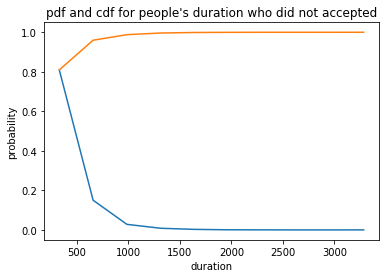

<Figure size 432x288 with 0 Axes>

In [46]:

counts, bin_edges = np.histogram(nooo['duration'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people's duration who did not accepted")

plt.xlabel("duration")
plt.ylabel("probability")
plt.show();
p14=plt.figure()
p14.savefig("p14.png")

### Observation :
1.people had a frequency value of less than 500 who rejected.

2.90% of the people had less than 500 seconds duration.

#### Univariate Analysis over columns.

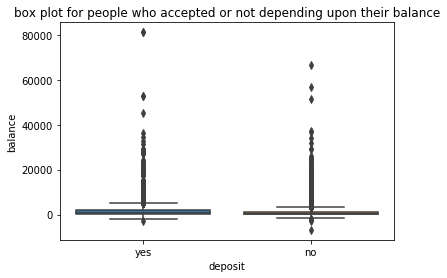

<Figure size 432x288 with 0 Axes>

In [47]:
sns.boxplot(x="deposit", y="balance", data=df)
plt.title("box plot for people who accepted or not depending upon their balance")
plt.show()
p15=plt.figure()
p15.savefig("p15.png")

### Obervation :
1.There is a less differentiation between yes and no,as they have lesser balance and some outliers in both cases.

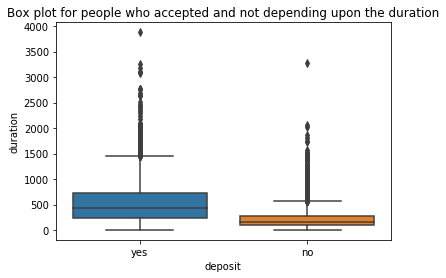

<Figure size 432x288 with 0 Axes>

In [48]:
sns.boxplot(x="deposit", y="duration", data=df)
plt.title("Box plot for people who accepted and not depending upon the duration")
plt.show()
p16=plt.figure()
p16.savefig("p16.png")

### Observation :
1.People who accepted had a median of 500 and IQR range from 300-700.

2.People who rejected had a IQR range less than 400.

#### Bar chart representations for categorical columns with respect to total and accept ratio in deposit.

In [49]:
def stack_plot(df, xtick, col2='deposit', col3='total'):
    ind = np.arange(df.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, df[col3].values)
    p2 = plt.bar(ind, df[col2].values)

    plt.ylabel('education')
    plt.title('subscribed to term deposit or not')
    plt.xticks(ind, list(df[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [50]:
def univariate_barplots(df, col1, col2='deposit', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq("yes").sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    #temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

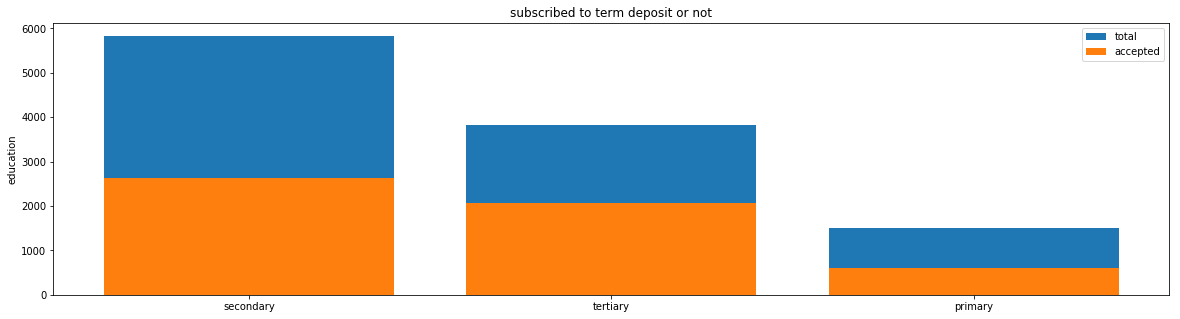

   education  deposit  total
1  secondary     2627   5830
2   tertiary     2067   3823
0    primary      595   1509
   education  deposit  total
1  secondary     2627   5830
2   tertiary     2067   3823
0    primary      595   1509


<Figure size 432x288 with 0 Axes>

In [51]:
univariate_barplots(df, 'education', 'deposit', False)
p17=plt.figure()
p17.savefig("p17.png")

### Observation :
1.Nearly half of the people accepted who had secondary as their education.

2.70% of the people had accepted who had tertiary as their education.

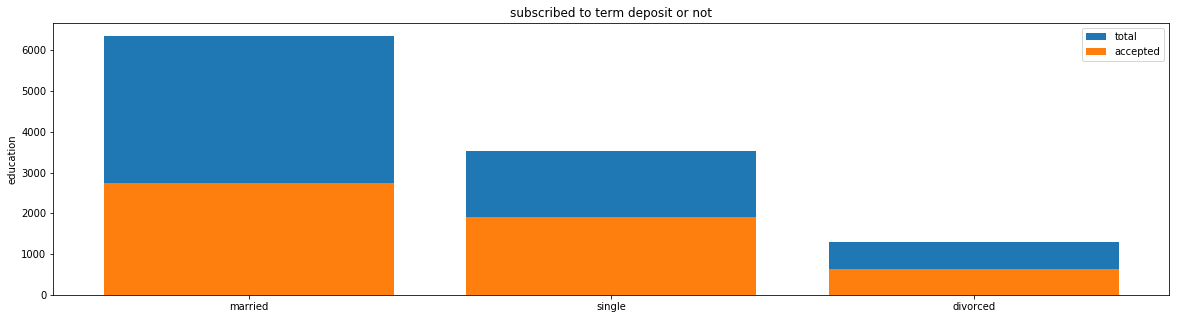

    marital  deposit  total
1   married     2755   6351
2    single     1912   3518
0  divorced      622   1293
    marital  deposit  total
1   married     2755   6351
2    single     1912   3518
0  divorced      622   1293


<Figure size 432x288 with 0 Axes>

In [52]:
univariate_barplots(df, 'marital', 'deposit', False)
p18=plt.figure()
p18.savefig("p18.png")

### Observation :
1.There is a equal acceptance and rejection rate for all the people in respect to their marital status.

2.Most of the people have been targeted with marital status of married or single. 

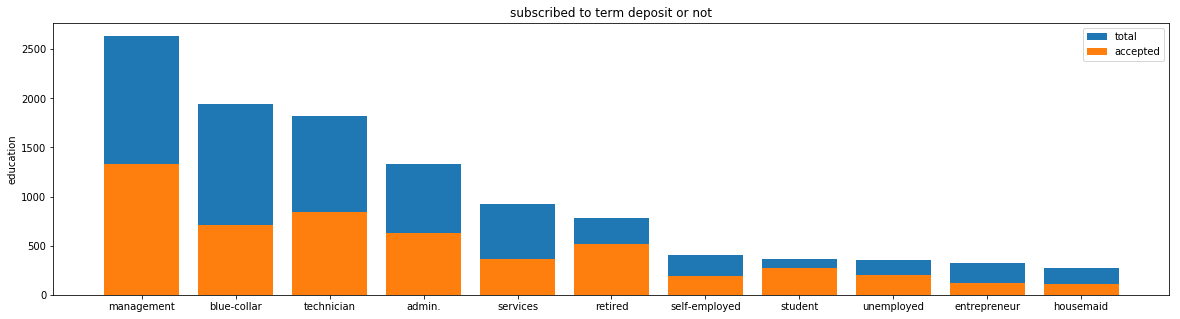

           job  deposit  total
4   management     1335   2636
1  blue-collar      708   1944
9   technician      840   1823
0       admin.      631   1334
7     services      369    923
              job  deposit  total
6   self-employed      187    405
8         student      269    360
10     unemployed      202    357
2    entrepreneur      123    328
3       housemaid      109    274


<Figure size 432x288 with 0 Axes>

In [53]:
univariate_barplots(df, 'job', 'deposit', False)
p19=plt.figure()
p19.savefig("p19.png")

### Observation :
1.Management job people where targeted a lot and had higher acceptance people.

2.Students and retired people had the highest acceptance rate when compared to others.

3.Services had a very low conversion rate.

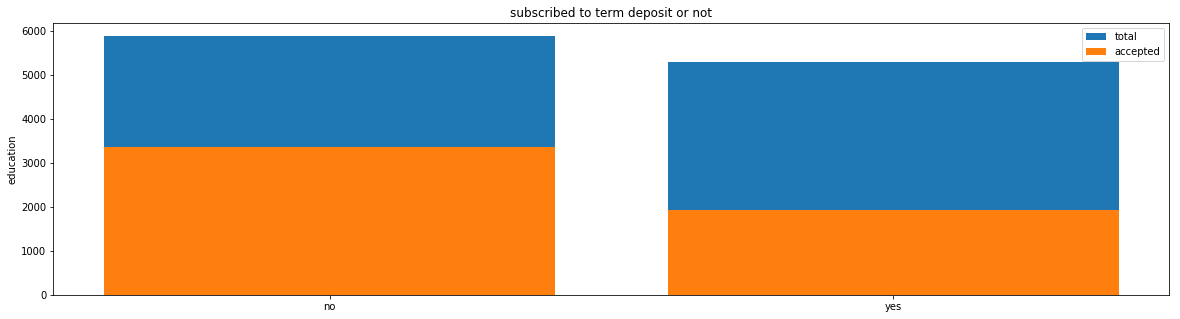

  housing  deposit  total
0      no     3354   5881
1     yes     1935   5281
  housing  deposit  total
0      no     3354   5881
1     yes     1935   5281


<Figure size 432x288 with 0 Axes>

In [54]:
univariate_barplots(df, 'housing', 'deposit', False)
p20=plt.figure()
p20.savefig("p20.png")

### Observation :
1.people who had a housing load and who did not have are equally balanced and can find no difference.

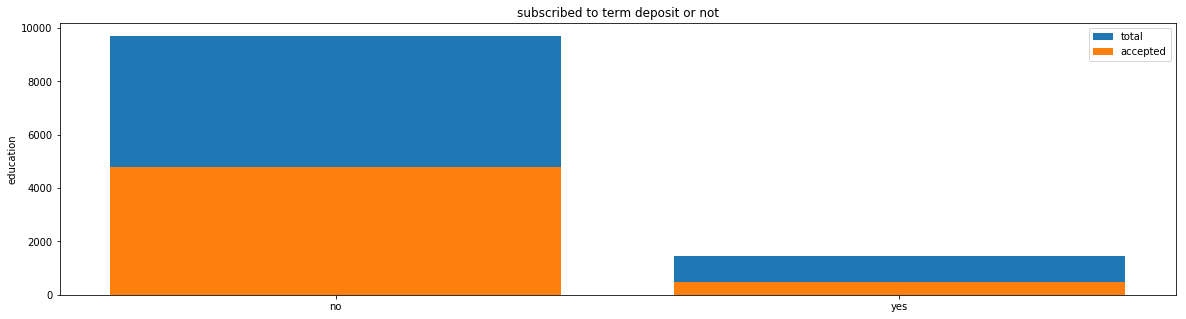

  loan  deposit  total
0   no     4805   9702
1  yes      484   1460
  loan  deposit  total
0   no     4805   9702
1  yes      484   1460


<Figure size 432x288 with 0 Axes>

In [55]:
univariate_barplots(df, 'loan', 'deposit', False)
p21=plt.figure()
p21.savefig("p21.png")

### Observation :
1.People who did not have a loan are being targeted and almost 10000 people have not had a loann before.

2.half of them accepted for term deposit.

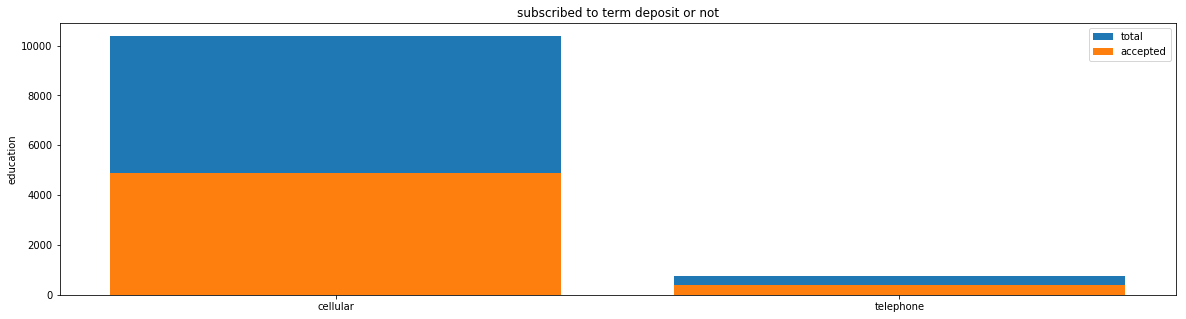

     contact  deposit  total
0   cellular     4899  10388
1  telephone      390    774
     contact  deposit  total
0   cellular     4899  10388
1  telephone      390    774


<Figure size 432x288 with 0 Axes>

In [56]:
univariate_barplots(df, 'contact', 'deposit', False)
p22=plt.figure()
p22.savefig("p22.png")

### Observation :
1.people have beedn targeted through cellular and both cellular and telephone have a half acceptance rate.

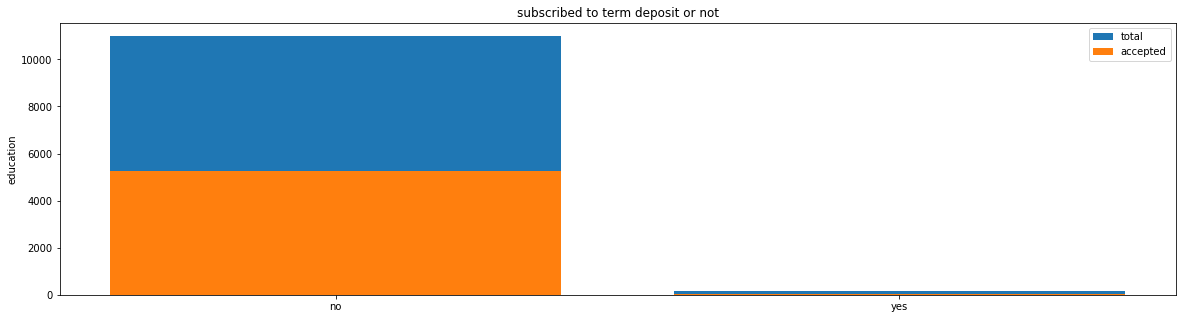

  default  deposit  total
0      no     5237  10994
1     yes       52    168
  default  deposit  total
0      no     5237  10994
1     yes       52    168


<Figure size 432x288 with 0 Axes>

In [57]:
univariate_barplots(df, 'default', 'deposit', False)
p23=plt.figure()
p23.savefig("p23.png")

### Observation :
1.People who didnot pursue a credit card by default are being targeted and and have a half acceptance rate.

2.The data is imbalanced in the default column.

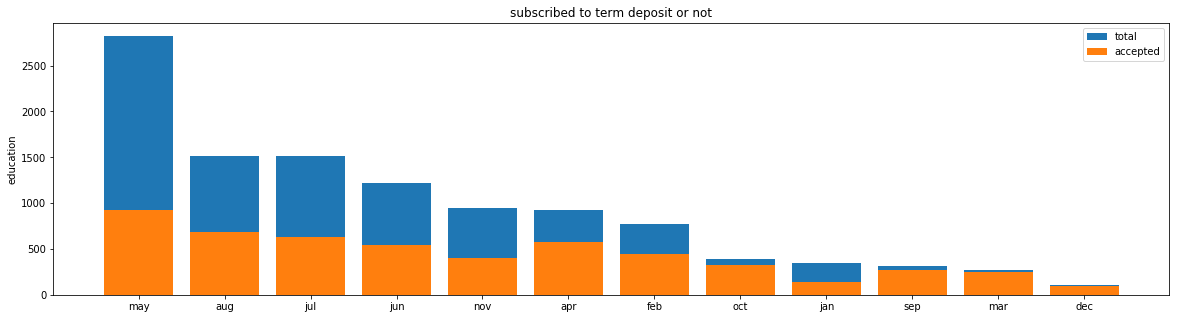

  month  deposit  total
8   may      925   2824
1   aug      688   1519
5   jul      627   1514
6   jun      546   1222
9   nov      403    943
   month  deposit  total
10   oct      323    392
4    jan      142    344
11   sep      269    319
7    mar      248    276
2    dec      100    110


<Figure size 432x288 with 0 Axes>

In [58]:
univariate_barplots(df, 'month', 'deposit', False)
p24=plt.figure()
p24.savefig("p24.png")

### Observation :
1.Highest acceptance is from may,august months.

2.high conversion rate is from october,september,march,december.

In [59]:
df.drop(['poutcome'],axis=1,inplace=True)

In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,yes


In [61]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [62]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [63]:
dfk=df['balance']
dfk.head()    

0    2343
1      45
2    1270
3    2476
4     184
Name: balance, dtype: int64

In [64]:
dfk[dfk<0]=0

In [65]:
dfk.value_counts()

0        1462
1          39
3          35
2          34
4          29
5          27
19         20
8          19
62         18
46         17
6          17
67         17
21         17
61         17
154        16
294        16
205        16
16         16
22         16
127        15
23         15
131        15
102        15
223        15
136        15
30         15
108        15
292        15
36         14
25         14
         ... 
1594        1
3643        1
5704        1
3531        1
1458        1
1306        1
1386        1
11528       1
1285        1
1269        1
3316        1
3395        1
1253        1
3300        1
3411        1
3419        1
1245        1
15578       1
1213        1
1394        1
1229        1
1402        1
1410        1
7561        1
1426        1
1434        1
7585        1
1442        1
1450        1
1995        1
Name: balance, Length: 3381, dtype: int64

In [66]:
df['balance']=list(dfk)

In [67]:
dfp=df['pdays']
dfp.head()   

0   -1
1   -1
2   -1
3   -1
4   -1
Name: pdays, dtype: int64

In [68]:
dfp[dfp<0]=0

In [69]:
dfp.value_counts()

0      8324
92      106
182      89
91       84
181      81
183      73
184      52
94       42
93       41
95       39
87       34
90       32
98       31
185      30
187      28
96       26
97       26
189      24
188      24
105      22
99       22
179      21
175      20
186      20
180      19
370      19
196      19
88       19
89       18
195      18
       ... 
481       1
449       1
425       1
395       1
403       1
435       1
20        1
444       1
428       1
420       1
404       1
268       1
228       1
108       1
68        1
44        1
36        1
12        1
459       1
4         1
771       1
683       1
603       1
595       1
587       1
579       1
515       1
491       1
475       1
651       1
Name: pdays, Length: 472, dtype: int64

In [70]:
df['pdays']=list(dfp)

In [71]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,0,0,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,0,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,0,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,0,0,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,0,0,yes


In [73]:
df['balance'].value_counts()

0        1462
1          39
3          35
2          34
4          29
5          27
19         20
8          19
62         18
46         17
6          17
67         17
21         17
61         17
154        16
294        16
205        16
16         16
22         16
127        15
23         15
131        15
102        15
223        15
136        15
30         15
108        15
292        15
36         14
25         14
         ... 
1594        1
3643        1
5704        1
3531        1
1458        1
1306        1
1386        1
11528       1
1285        1
1269        1
3316        1
3395        1
1253        1
3300        1
3411        1
3419        1
1245        1
15578       1
1213        1
1394        1
1229        1
1402        1
1410        1
7561        1
1426        1
1434        1
7585        1
1442        1
1450        1
1995        1
Name: balance, Length: 3381, dtype: int64

#### Label Encoding.

In [74]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [75]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15]

In [76]:
y.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [77]:
y=lb.fit_transform(y)
y.shape

(11162,)

In [78]:
x[:,3]=lb.fit_transform(x[:,3])
x[:,4]=lb.fit_transform(x[:,4])
x[:,6]=lb.fit_transform(x[:,6])
x[:,7]=lb.fit_transform(x[:,7])
x[:,8]=lb.fit_transform(x[:,8])
x[:,10]=lb.fit_transform(x[:,10])


In [79]:
x[:,2]=lb.fit_transform(x[:,2])

In [80]:
x.shape

(11162, 15)

In [81]:
x[:,1]=lb.fit_transform(x[:,1])

#### OneHot Encoding.

In [82]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[1])

In [83]:
x=oh.fit_transform(x).toarray()
x=x[:,1:]

In [84]:
x

array([[   0.,    0.,    0., ...,    1.,    0.,    0.],
       [   0.,    0.,    0., ...,    1.,    0.,    0.],
       [   0.,    0.,    0., ...,    1.,    0.,    0.],
       ..., 
       [   0.,    0.,    0., ...,    2.,    0.,    0.],
       [   0.,    0.,    0., ...,    2.,  172.,    5.],
       [   0.,    0.,    0., ...,    1.,    0.,    0.]])

In [85]:
x.shape

(11162, 24)

In [86]:
oh1=OneHotEncoder(categorical_features=[11])

In [87]:
x=oh1.fit_transform(x).toarray()
x=x[:,1:]

In [88]:
x.shape

(11162, 25)

In [89]:
x.shape

(11162, 25)

In [90]:
df2=pd.DataFrame(y,columns=['deposit'])

In [91]:
df1=pd.DataFrame(x,columns=['marital1','marital2','job1','job2','job3','job4','job5','job6','job7','job8','job9','job10','age','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','Previous',])

In [92]:
df2.head()

,deposit
0,1
1,1
2,1
3,1
4,1


#### Finding Correlation.

In [93]:
df1.corr()

,marital1,marital2,job1,job2,job3,job4,job5,job6,job7,job8,...,balance,housing,loan,contact,day,month,duration,campaign,pdays,Previous
marital1,1.000000,-0.779455,0.109188,0.050746,0.039865,-0.009730,0.098276,-0.008164,-0.013907,-0.194390,...,0.026333,0.036305,0.044148,0.060964,0.002832,-0.026565,-0.036179,0.047722,-0.019288,-0.005176
marital2,-0.779455,1.000000,-0.077645,-0.058665,-0.060264,0.017342,-0.166003,0.016864,0.004966,0.250543,...,-0.016471,-0.043817,-0.065288,-0.058410,-0.003961,0.011419,0.023847,-0.046165,0.031226,0.023817
job1,0.109188,-0.077645,1.000000,-0.079905,-0.072850,-0.255346,-0.125701,-0.089107,-0.137880,-0.083836,...,-0.045282,0.189848,0.057956,-0.018414,-0.023039,0.073903,0.029986,0.005522,-0.030528,-0.039939
job2,0.050746,-0.058665,-0.079905,1.000000,-0.027602,-0.096748,-0.047627,-0.033762,-0.052241,-0.031764,...,0.005862,0.011492,0.042631,0.006799,-0.004463,0.025064,-0.000908,0.013883,-0.029682,-0.022470
job3,0.039865,-0.060264,-0.072850,-0.027602,1.000000,-0.088207,-0.043422,-0.030781,-0.047629,-0.028960,...,-0.008233,-0.062196,-0.027197,0.027349,0.013318,-0.020701,-0.010807,0.010570,-0.025942,-0.022766
job4,-0.009730,0.017342,-0.255346,-0.096748,-0.088207,1.000000,-0.152197,-0.107890,-0.166945,-0.101508,...,0.046333,-0.072310,-0.051793,-0.037188,0.008277,-0.050219,-0.018162,0.017343,0.016063,0.021019
job5,0.098276,-0.166003,-0.125701,-0.047627,-0.043422,-0.152197,1.000000,-0.053112,-0.082183,-0.049970,...,0.074755,-0.172708,-0.048794,0.160725,-0.004511,-0.016287,0.014194,-0.037943,0.004073,0.019384
job6,-0.008164,0.016864,-0.089107,-0.033762,-0.030781,-0.107890,-0.053112,1.000000,-0.058258,-0.035423,...,0.020319,-0.016903,0.004299,0.003614,0.006458,-0.005631,0.013506,0.001776,-0.011239,-0.002338
job7,-0.013907,0.004966,-0.137880,-0.052241,-0.047629,-0.166945,-0.082183,-0.058258,1.000000,-0.054811,...,-0.041405,0.084247,0.032097,-0.023053,0.002497,0.043784,0.012077,0.007496,0.000710,-0.019366
job8,-0.194390,0.250543,-0.083836,-0.031764,-0.028960,-0.101508,-0.049970,-0.035423,-0.054811,1.000000,...,-0.002711,-0.121195,-0.069314,0.012050,-0.010472,-0.007857,-0.021732,-0.022735,0.028985,0.037012


#### Feature Selection using Embedded method.

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [95]:
bf=SelectKBest(score_func=chi2,k=10)
fit=bf.fit(df1,df2)

In [96]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df1.columns)

In [97]:
featscore=pd.concat([dfcolumns,dfscore],axis=1)
featscore.columns=["specs","score"]

In [98]:
print(featscore.nlargest(25,'score'))

        specs          score
21   duration  738362.340031
15    balance  465537.468425
23      pdays   57548.254637
24   Previous    1377.692852
22   campaign     540.843795
16    housing     244.474430
19        day     160.354675
17       loan     118.635404
6        job5     111.940341
9        job8     107.918053
2        job1      93.735234
1    marital2      68.453963
12        age      46.796396
13  education      41.974888
0    marital1      40.859643
20      month      28.774412
8        job7      20.303856
14    default      18.193635
3        job2      12.852516
11      job10      12.116217
5        job4      11.242948
4        job3       6.352818
18    contact       2.800787
10       job9       1.247331
7        job6       0.238284


In [99]:
df1.drop(["job1","job2","job3","job4","job5","job6","job7","job8","job9","job10",'marital1','marital2','default',"month","age","education","contact"],axis=1,inplace=True)

In [100]:
df1.head()

,balance,housing,loan,day,duration,campaign,pdays,Previous
0,2343.0,1.0,0.0,5.0,1042.0,1.0,0.0,0.0
1,45.0,0.0,0.0,5.0,1467.0,1.0,0.0,0.0
2,1270.0,1.0,0.0,5.0,1389.0,1.0,0.0,0.0
3,2476.0,1.0,0.0,5.0,579.0,1.0,0.0,0.0
4,184.0,0.0,0.0,5.0,673.0,2.0,0.0,0.0


In [101]:
df1.isnull().any()

balance     False
housing     False
loan        False
day         False
duration    False
campaign    False
pdays       False
Previous    False
dtype: bool

In [102]:
df2['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [103]:
df2['deposit'].isnull().any()

False

In [104]:
export_csv=df1.to_csv(r'l1.csv')

In [105]:
export_csv1=df2.to_csv(r'l2.csv')

### Analytics is helping the banking industry become smarter in managing the myriad challenges.

##### Challenges:
1. What is the best time to market the product?
        The best time to market a customer is at may,October,September,march and december,as they have a higher conversion rate.
2. Which is the most effective channel to contact a customer?
        Effective channel to contact a customer is through cellular as it has a higher conversion rate.

In [108]:
from tabulate import tabulate


dd = pd.DataFrame({'Accuracy' : ['77.2%', '77.5%', '78.6%', "72.2%",'77.9%','78.4%','78.5%'],
                   'f1-score' : ['75.5%', '74.1%', '77.6%', '70.5%','75.7%','77%','77.3%'],
                  'ROC_AUC' : ["77.1%","77.1%","78.7%","72.2%",'77.7%','77%','78.6%'],
                  'log_loss' : ['7.8%', '7.7%' , '7.4%',"9.5%", '7.6%','7.4%','7.4%']},index=["K-NN","Logistic Regression","SVM","Decision Tree","Random-Forest-10","Random-Forest-100","Random-Forest-1000"])
print(tabulate(dd, headers='keys',tablefmt='psql'))

+---------------------+------------+------------+-----------+------------+
|                     | Accuracy   | f1-score   | ROC_AUC   | log_loss   |
|---------------------+------------+------------+-----------+------------|
| K-NN                | 77.2%      | 75.5%      | 77.1%     | 7.8%       |
| Logistic Regression | 77.5%      | 74.1%      | 77.1%     | 7.7%       |
| SVM                 | 78.6%      | 77.6%      | 78.7%     | 7.4%       |
| Decision Tree       | 72.2%      | 70.5%      | 72.2%     | 9.5%       |
| Random-Forest-10    | 77.9%      | 75.7%      | 77.7%     | 7.6%       |
| Random-Forest-100   | 78.4%      | 77%        | 77%       | 7.4%       |
| Random-Forest-1000  | 78.5%      | 77.3%      | 78.6%     | 7.4%       |
+---------------------+------------+------------+-----------+------------+
